In [19]:
from pprint import pprint

In [45]:
pref = {}
suf = {}
currents_p = []
currents_s = []
edges_p = {}
edges_s = {}
with open('razmetka.csv') as f:
    for line in f:
        morline = line.split(';')
        if morline[1] == 'сустав':
            print(morline)
        if morline[2] == 'префикс':
            currents_p.append(morline[1])
        elif morline[2] == 'суффикс':
            currents_s.append(morline[1])
        else:
            if currents_s and len(currents_s) > 1:
                for i in range(len(currents_s)-1):
                    suf[currents_s[i]] = suf.get(currents_s[i], set())
                    suf[currents_s[i]].add(currents_s[i+1])
                    edges_s[(currents_s[i], currents_s[i+1])] = morline[0]
            elif currents_p and len(currents_p) > 1:
                for i in range(len(currents_p)-1):
                    pref[currents_p[i]] = pref.get(currents_p[i], set())
                    pref[currents_p[i]].add(currents_p[i+1])
                    edges_p[(currents_p[i], currents_p[i+1])] = morline[0]
            currents_p, currents_s = [], []

['межсуставный', 'сустав', 'префикс', '2', '', 'A', '', '', '', '\n']


In [22]:
pprint(len(suf))

417


In [26]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
edges_p = list(set(edges_p))
pG = nx.DiGraph(edges_p)

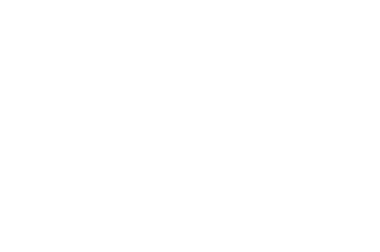

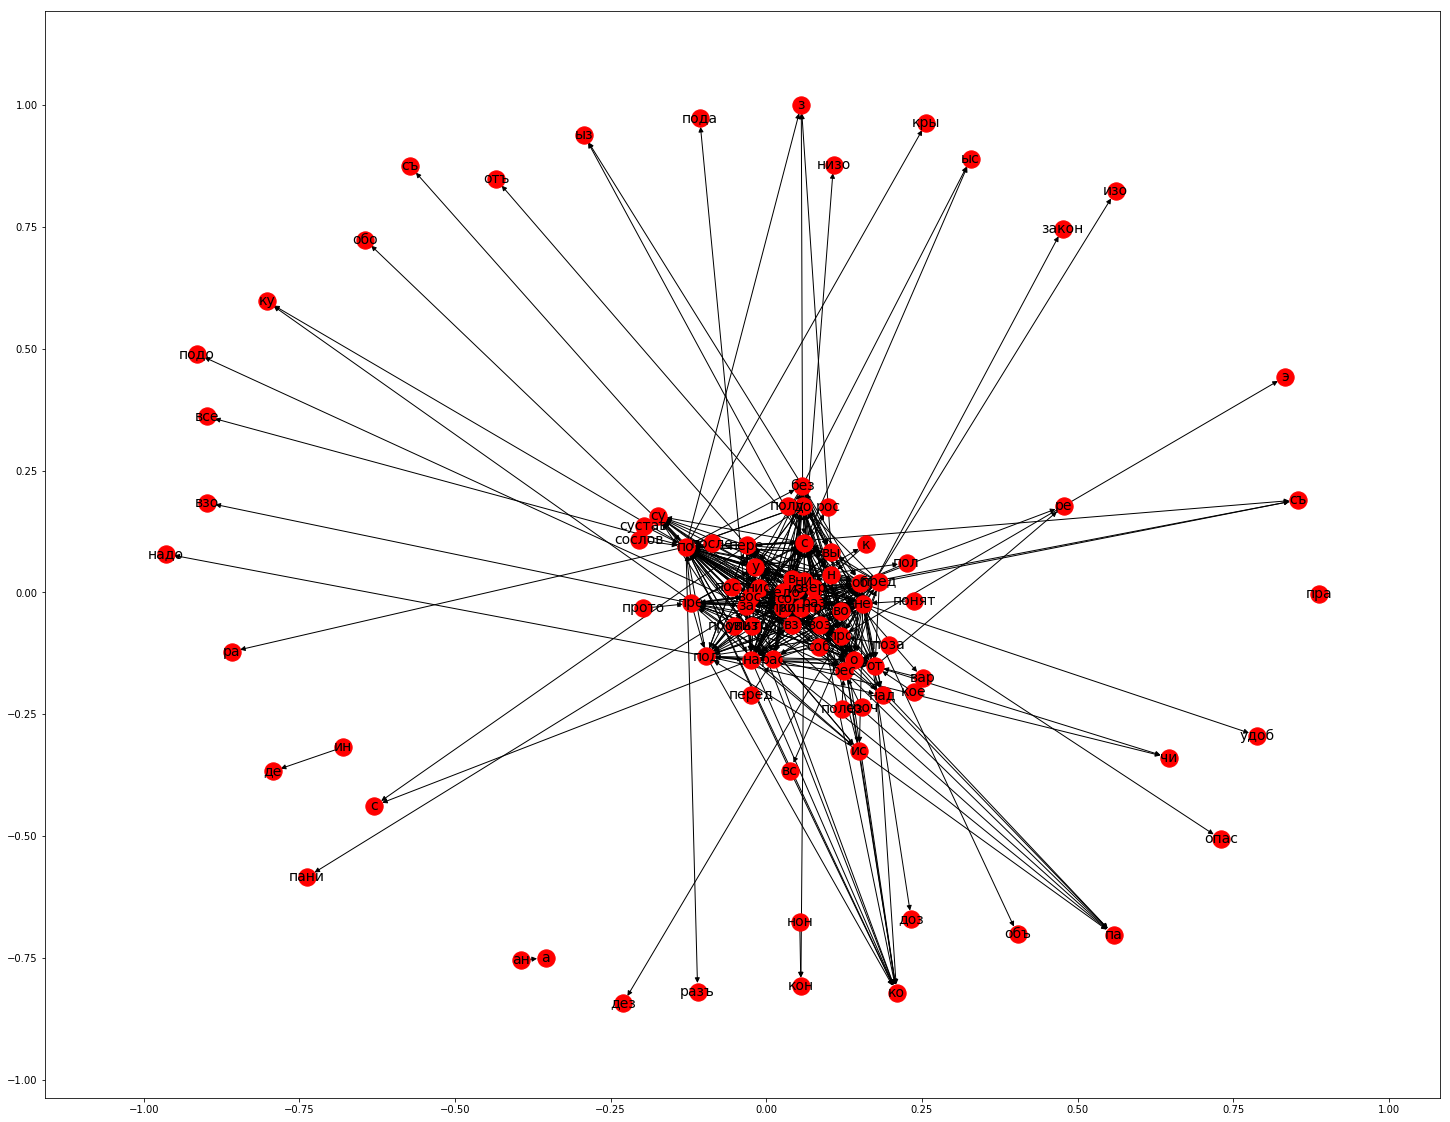

In [39]:
plt.axis('off')
plt.figure(figsize=(25,20));
nx.draw_networkx(pG, with_labels=True, font_size=14)

In [40]:
p_d = nx.out_degree_centrality(pG)

In [41]:
for key in sorted(p_d, key=lambda x: p_d[x], reverse=True):
    print(key, p_d[key])

не 0.39361702127659576
по 0.35106382978723405
на 0.24468085106382978
пере 0.23404255319148937
за 0.2127659574468085
пред 0.19148936170212766
со 0.19148936170212766
под 0.18085106382978722
до 0.1702127659574468
пре 0.1595744680851064
без 0.1595744680851064
при 0.14893617021276595
с 0.14893617021276595
в 0.13829787234042554
про 0.1276595744680851
о 0.11702127659574468
от 0.10638297872340426
бес 0.10638297872340426
рас 0.10638297872340426
из 0.10638297872340426
у 0.09574468085106383
раз 0.09574468085106383
об 0.07446808510638298
недо 0.07446808510638298
сверх 0.06382978723404255
вос 0.05319148936170213
вы 0.05319148936170213
ис 0.05319148936170213
над 0.0425531914893617
ни 0.0425531914893617
контр 0.0425531914893617
во 0.031914893617021274
соб 0.031914893617021274
воз 0.031914893617021274
вз 0.02127659574468085
н 0.02127659574468085
вс 0.02127659574468085
после 0.02127659574468085
нис 0.02127659574468085
ре 0.02127659574468085
су 0.010638297872340425
нон 0.010638297872340425
сустав 0.0106

In [54]:
for x in pG.in_edges('не'):
    print(x)

('воз', 'не')
('за', 'не')
('до', 'не')
('соб', 'не')
('под', 'не')
('из', 'не')
('пре', 'не')
('сверх', 'не')
('при', 'не')
('раз', 'не')
('понят', 'не')
('по', 'не')


In [52]:
edges_p[('сверх', 'не')]

'сверхнеобходимый'